(np.float64(-200.0), np.float64(200.0), np.float64(-200.0), np.float64(200.0))

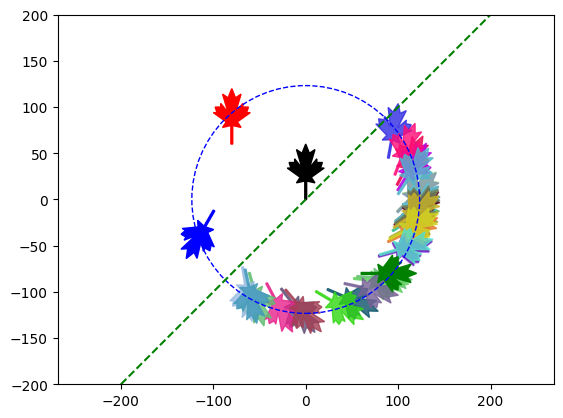

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as alg

# Définition du motif de base
F0 = 2 * np.array([[-0.5, -0.5, -5, -3, -10, -8, -9, -6, -6, -2, -5, -2, 0, 2, 5, 2, 6, 6, 9, 8, 10, 3, 5, 0.5, 0.5],  # abscisses
                   [0, 10, 9, 12, 17, 17, 20, 20, 22, 17, 27, 25, 30, 25, 27, 17, 22, 20, 20, 17, 17, 12, 9, 10, 0]])  # ordonnées
m, n = F0.shape   # dimension de la matrice F0
u = np.array([[-80], [60]])
N = np.array([[np.sqrt(2)/2], [np.sqrt(2)/2]])
F1 = F0 + u
S = 2*N@N.T - np.eye(2)
F2 = S@F1
theta = -2 * np.pi / 3
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])
F3 = R @ F2
# Taille du cadre d'affichage
L = 200
cadre = [-L, L, -L, L]

nombre_feuilles = 30
for _ in range(nombre_feuilles):
    vecteur_aleatoire = np.random.rand(2, 1)
    vecteur_unitaire = vecteur_aleatoire / np.linalg.norm(vecteur_aleatoire)
    matrice_symetrie = 2 * vecteur_unitaire @ vecteur_unitaire.T - np.eye(2)
    motif_symetrique = matrice_symetrie @ F1
    couleur_aleatoire = np.random.rand(3,)
    plt.fill(motif_symetrique[0, :], motif_symetrique[1, :], color=couleur_aleatoire, alpha=0.8)

# Affichage du motif de base
plt.figure(1, figsize=(8, 8))
plt.fill(F0[0, :], F0[1, :], c=[0,0,0])   # [0,0,0]=noir
plt.fill(F1[0, :], F1[1, :], color='red')
plt.fill(F2[0, :], F2[1, :], color='green')
plt.fill(F3[0, :], F3[1, :], color='blue')
x_vals = np.linspace(-L, L, 100)
y_vals = x_vals
G2 = np.mean(F2, axis=1)
r = np.linalg.norm(G2)
plt.plot(x_vals, y_vals, '--', color='green')
circle = plt.Circle((0, 0), r, color='blue', fill = False, linestyle='--')
plt.gca().add_artist(circle)
plt.axis('equal')
plt.axis(cadre)


Les feuilles forment un demi-cercle car les vecteurs des axes de symétrie ont des composantes positives. Il faudrait alors enlever cette condition pour avoir le cercle complet.

(np.float64(-200.0), np.float64(200.0), np.float64(-200.0), np.float64(200.0))

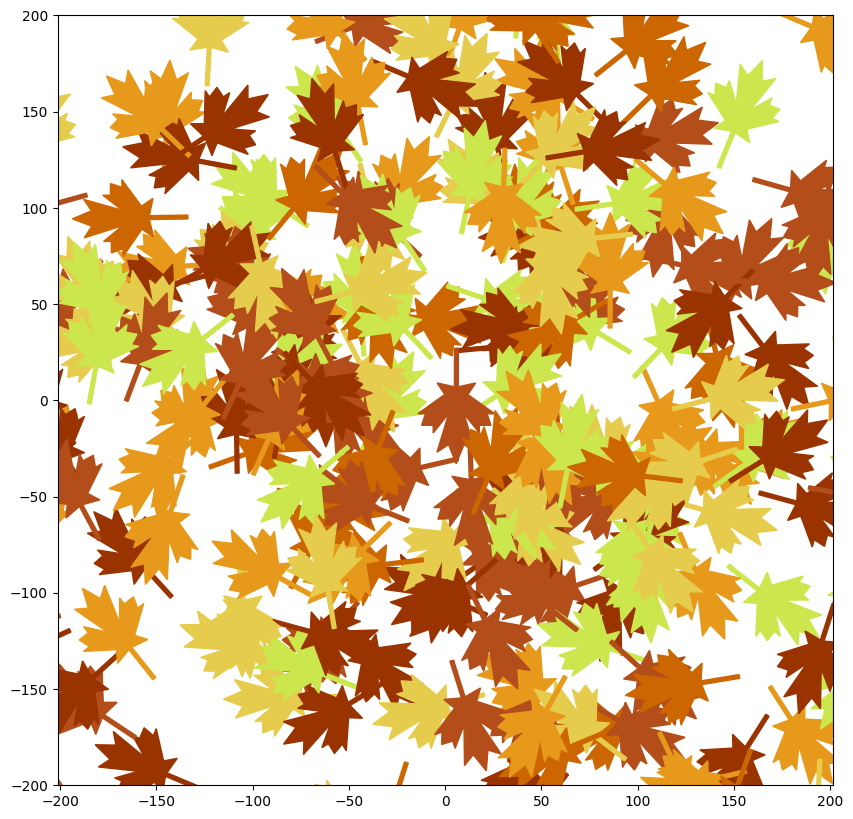

In [2]:
import random as rd
nombre_feuilles = 300
taille_cadre = 200
intervalle_translation = [-taille_cadre, taille_cadre]

plt.figure(figsize=(10, 10))

for _ in range(nombre_feuilles):
    angle = np.random.uniform(0, 2 * np.pi)
    matrice_rotation = np.array([[np.cos(angle), -np.sin(angle)],
                                  [np.sin(angle), np.cos(angle)]])
    
    motif_roté = matrice_rotation @ F1
    
    translation = np.random.uniform(intervalle_translation[0], intervalle_translation[1], (2, 1))
    motif_translate = motif_roté + translation
    
    couleur_automnale = rd.choice([(0.8, 0.4, 0), (0.9, 0.6, 0.1), (0.7, 0.3, 0.1), (0.9, 0.8, 0.3), (0.6, 0.2, 0), (0.8, 0.9, 0.3)])
    
    plt.fill(motif_translate[0, :], motif_translate[1, :], color=couleur_automnale)

plt.axis('equal')
plt.axis([-taille_cadre, taille_cadre, -taille_cadre, taille_cadre])
